In [76]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_summary_statistics(summary_stats, var_interest):
    # Plot for Median, 25th Percentile, and 75th Percentile
    plt.figure(figsize=(12, 6))
    plt.plot(summary_stats.index, summary_stats['Median'], label='Median', marker='o')
    plt.plot(summary_stats.index, summary_stats['25th Percentile'], label='25th Percentile', marker='o')
    plt.plot(summary_stats.index, summary_stats['75th Percentile'], label='75th Percentile', marker='o')
    plt.xlabel('Queue')
    plt.ylabel('Values (seconds)')
    plt.title(f'Median, 25th and 75th Percentiles of {var_interest} by Queue')
    plt.legend()
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'visualization_time/{var_interest}_quantiles_by_queue.png')
    plt.show()

    # Plot for Mean
    plt.figure(figsize=(12, 6))
    plt.plot(summary_stats.index, summary_stats['Mean'], label='Mean', color='red', marker='o')
    plt.xlabel('Queue')
    plt.ylabel('Mean Value (seconds)')
    plt.title(f'Mean of {var_interest} by Queue')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'visualization_time/{var_interest}_mean_by_queue.png')
    plt.show()

    # Plot for Summation
    plt.figure(figsize=(12, 6))
    plt.plot(summary_stats.index, summary_stats['Summation'], label='Summation', color='purple', marker='o')
    plt.xlabel('Queue')
    plt.ylabel('Summation Value (seconds)')
    plt.title(f'Summation of {var_interest} by Queue')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'visualization_time/{var_interest}_summation_by_queue.png')
    plt.show()


In [77]:

#Step 1: Count occurrences of each queue and sort in descending order
queue_counts = df['queue_rename'].value_counts()
sorted_queues = queue_counts.index
print(sorted_queues)

# Step 2: Reorder DataFrame based on the sorted queue order
df['queue_rename'] = pd.Categorical(df['queue_rename'], categories=sorted_queues, ordered=True)

# Reorder DataFrame
df_sorted = df.copy()
df_sorted['queue_rename'] = df_sorted['queue_rename'].cat.reorder_categories(sorted_queues)


print(df_sorted.head())

CategoricalIndex(['standard', 'compbio_auto', 'compbio', 'priority', 'biostat',
                  'large_mem', 'short', 'cab_auto', 'gpu', 'cryoem',
                  'superdome', 'interactive', 'heavy_io', 'large_mem_cbi',
                  'gpu_short', 'dragen', 'hpcf_test_gpu', 'dgx',
                  'gpu_interactive', 'gpu_priority', 'archiving', 'hpcf_test',
                  'fakeroot'],
                 categories=['standard', 'compbio_auto', 'compbio', 'priority', ..., 'gpu_priority', 'archiving', 'hpcf_test', 'fakeroot'], ordered=True, dtype='category')
   userId      jobId  jobIdx  numProcessors jStatus  \
0   69430  233656568       0              4    exit   
1  107357  233656570       0              4    done   
2  107357  233656569       0              4    done   
3  107357  233656571       0              4    done   
4  107357  233656572       0              4    done   

                  submitTime                  startTime  \
0  2024-08-19 00:01:34-05:00  2024-08-1

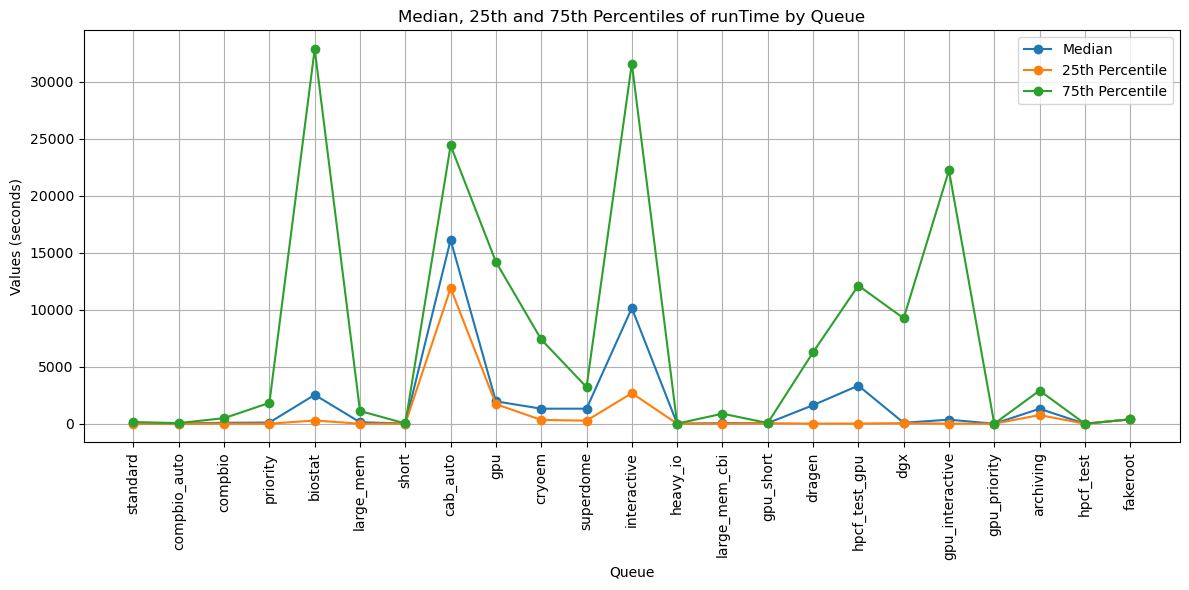

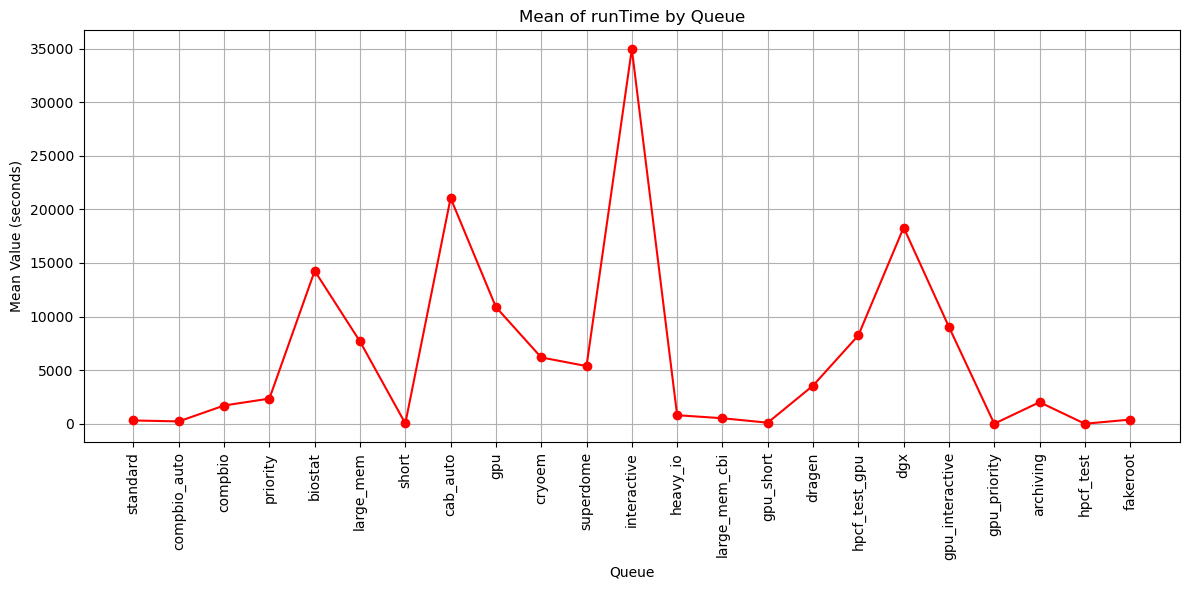

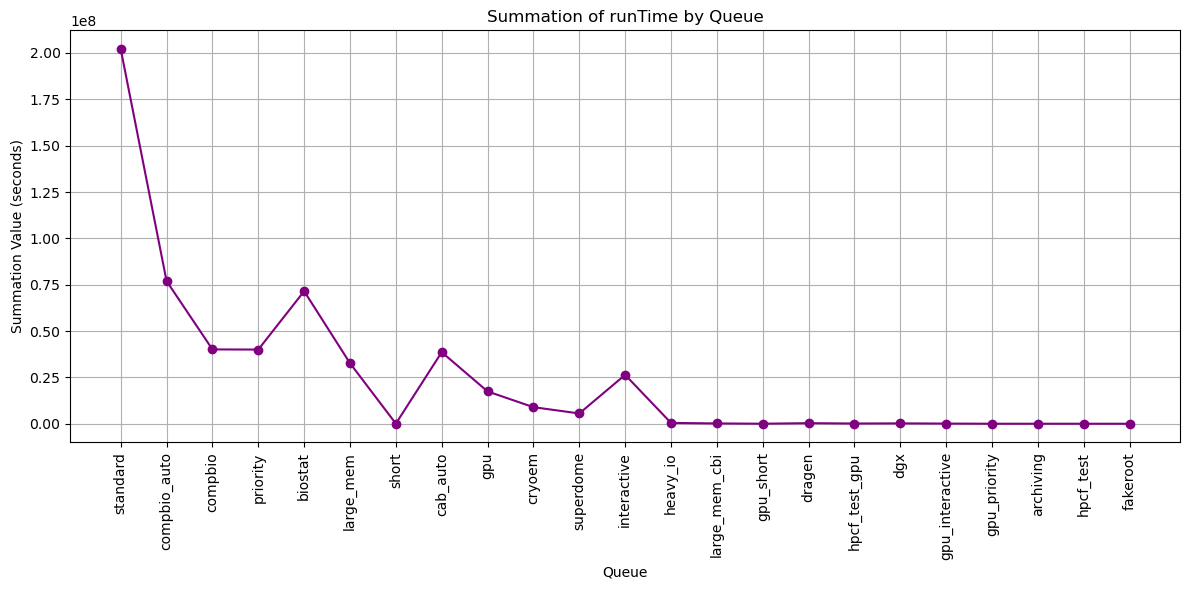

In [78]:
# Calculate summary statistics of runTime by queue
var_interest = 'runTime'
summary_stats_by_queue = summary_statistics_by_queue(df_sorted, var_interest)

# Plotting


plot_summary_statistics(summary_stats_by_queue, var_interest)


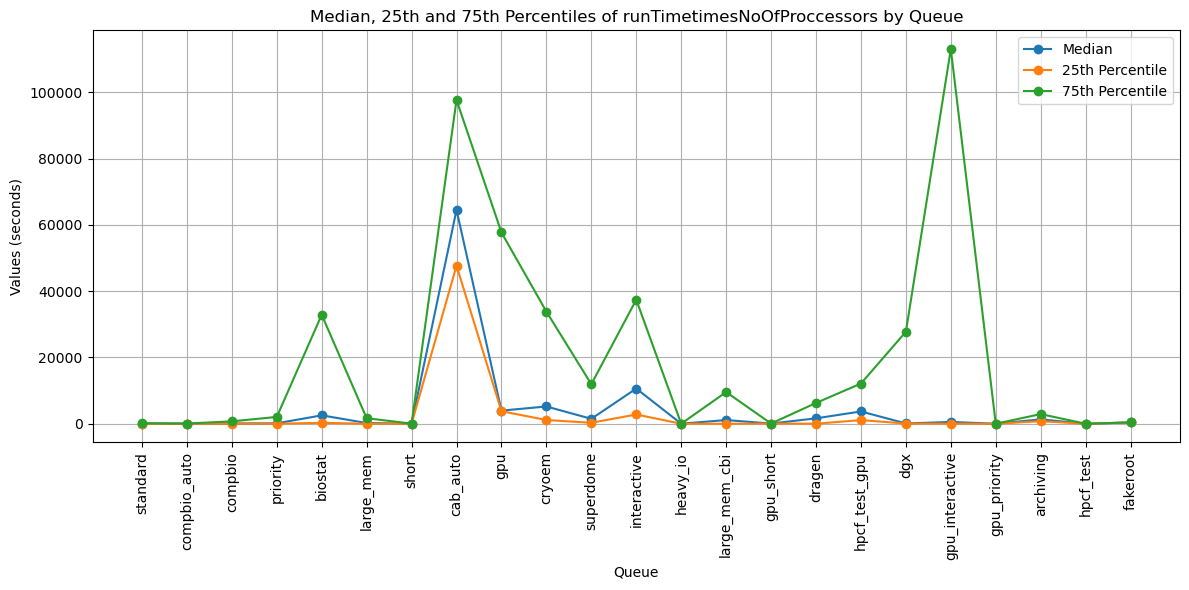

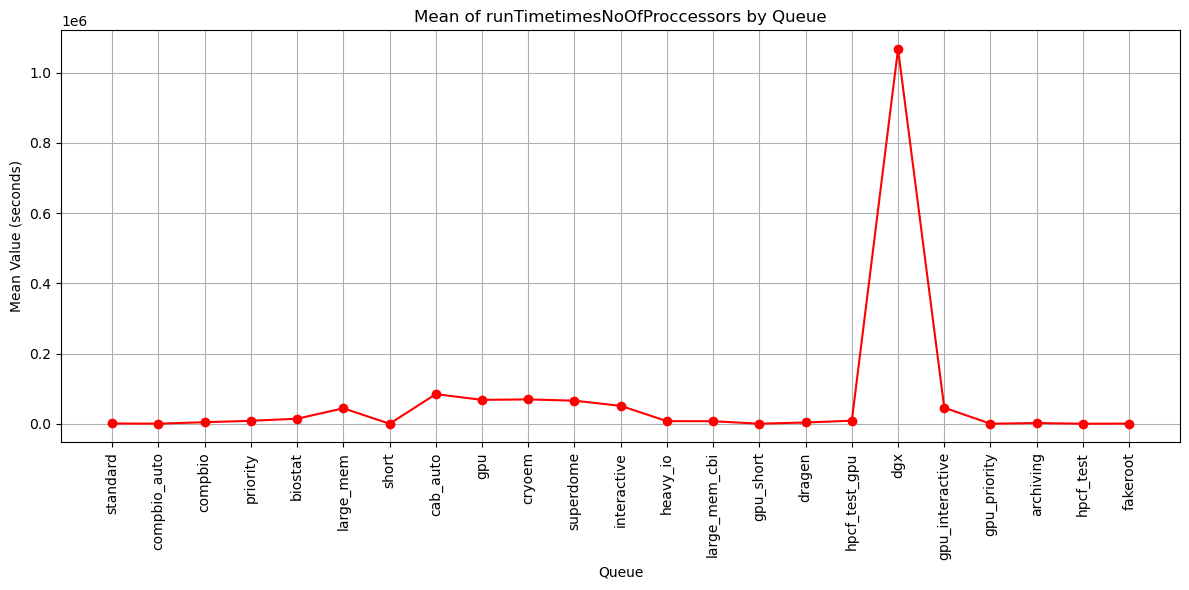

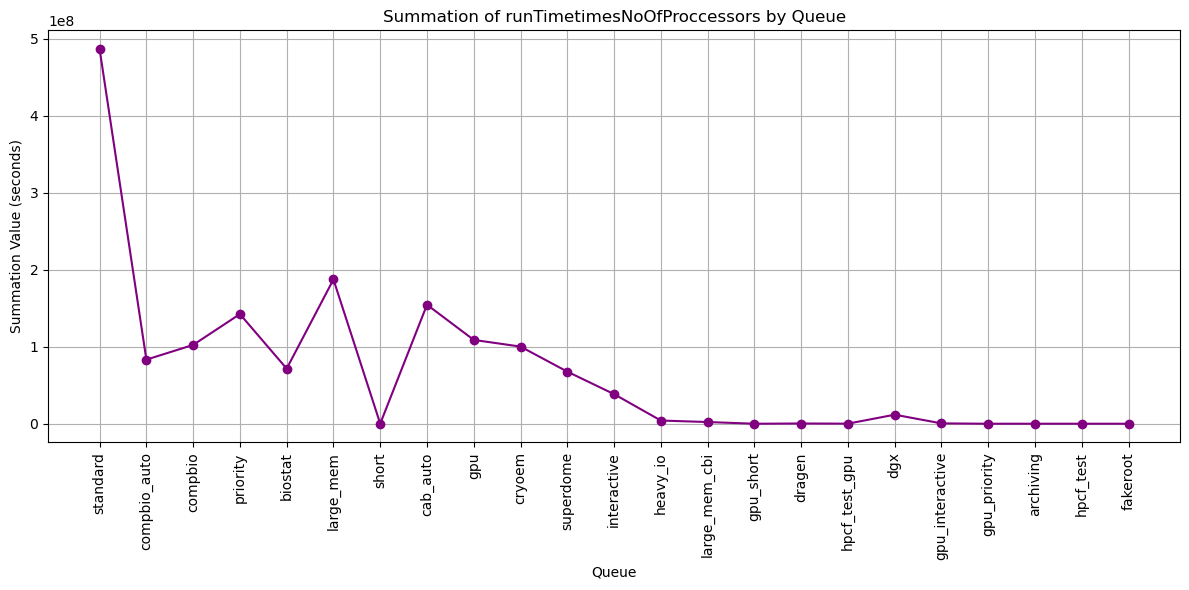

In [79]:
# Calculate summary statistics of runTime*number of processors by queue

df_sorted['runTimetimesNoOfProccessors']=df_sorted['runTime'] * df_sorted['numProcessors']

var_interest = 'runTimetimesNoOfProccessors'
summary_stats_by_queue = summary_statistics_by_queue(df_sorted, var_interest)

# Plotting

plot_summary_statistics(summary_stats_by_queue, var_interest)

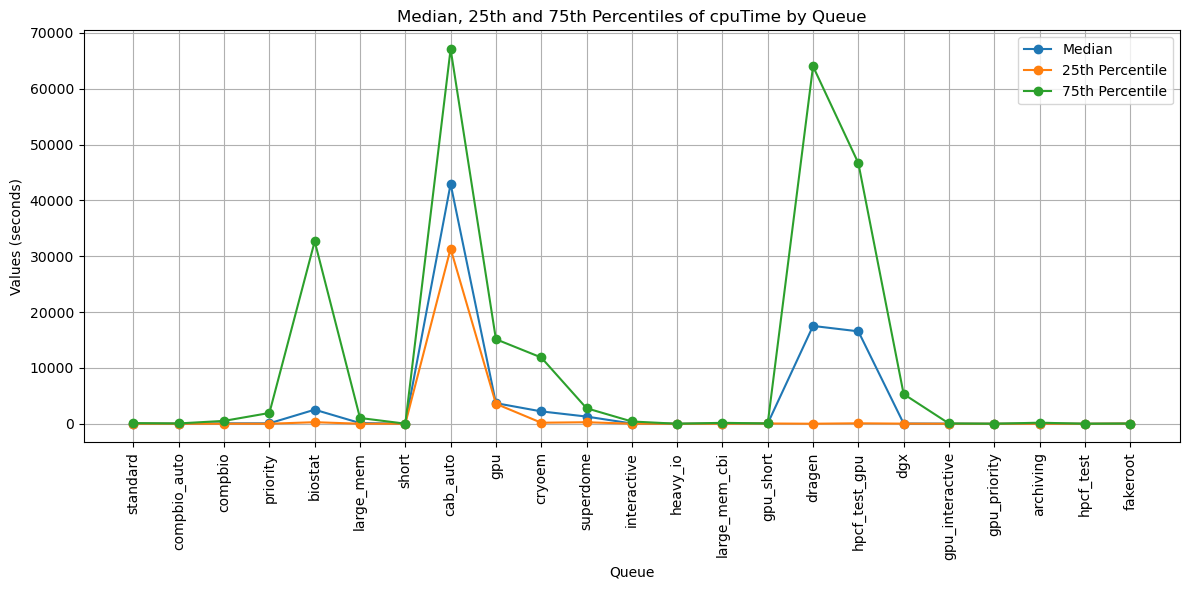

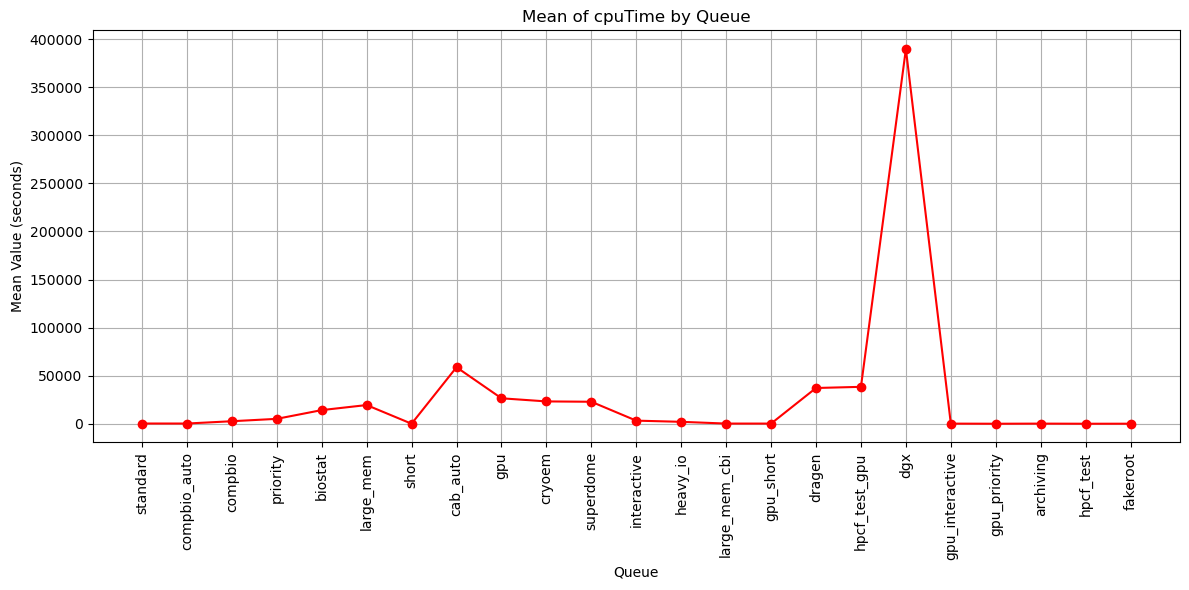

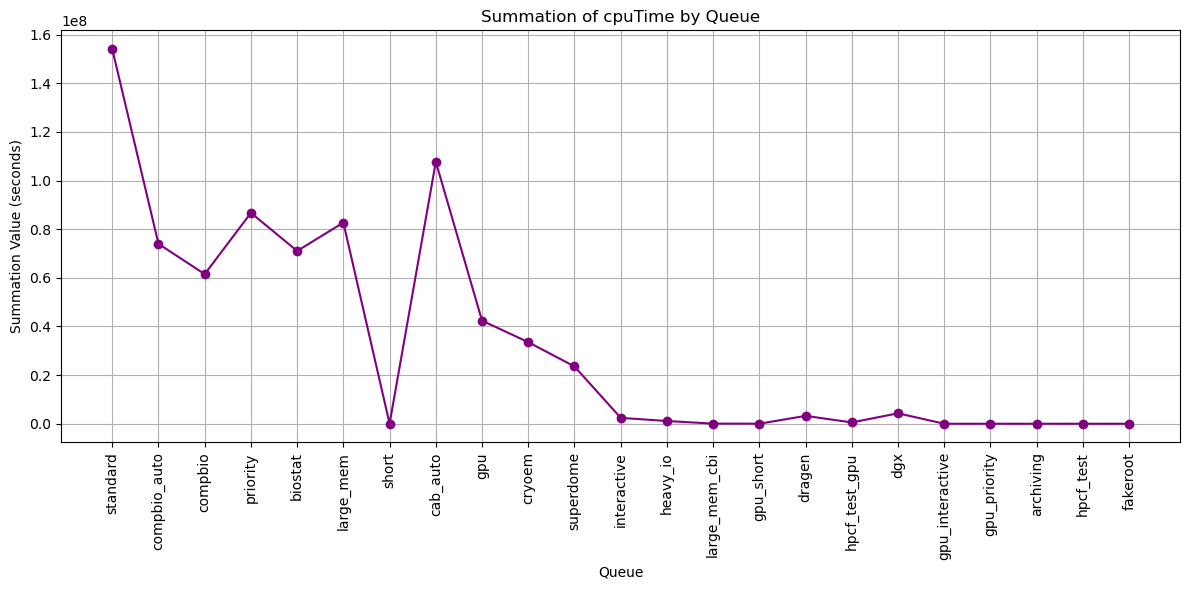

In [80]:
### calculate the cpuTime by queues
var_interest = 'cpuTime'
summary_stats_by_queue = summary_statistics_by_queue(df_sorted, var_interest)

# Plotting
plot_summary_statistics(summary_stats_by_queue, var_interest)

                          Mean   Median  Min       Max       Std Dev  \
queue_rename                                                           
standard            747.075735      5.0  0.0  114768.0   2069.864544   
compbio_auto       4912.690957    864.0  0.0  439927.0  16354.658027   
compbio             200.637124      5.0  0.0   22239.0    925.155520   
priority           3010.034630     24.0  0.0  232406.0   8351.699915   
biostat               3.795332      4.0  0.0      64.0      1.854440   
large_mem          6956.815897     27.0  0.0  139078.0  19923.628029   
short            103667.004449  71200.0  1.0  373706.0  95535.550745   
cab_auto          93814.220831  62065.0  1.0  355098.0  88914.580047   
gpu               15002.676943   3582.0  0.0   52259.0  18159.634310   
cryoem              132.376669      4.0  0.0   14698.0    912.404822   
superdome          3891.609375    856.0  0.0   30271.0   5879.701438   
interactive          12.181572      4.0  0.0     268.0     30.30

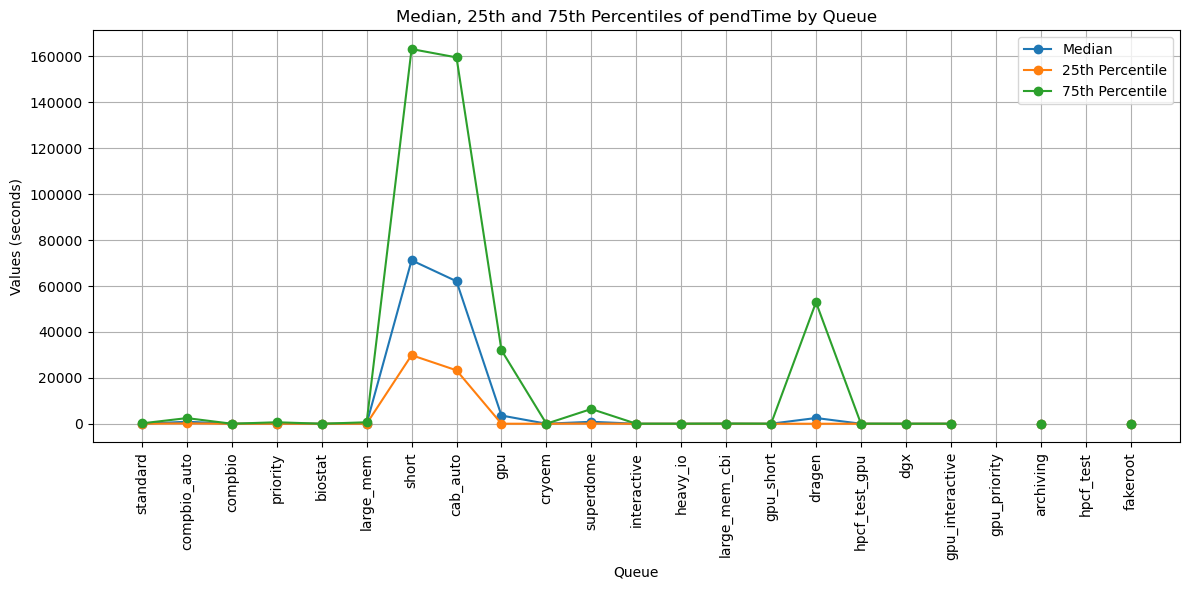

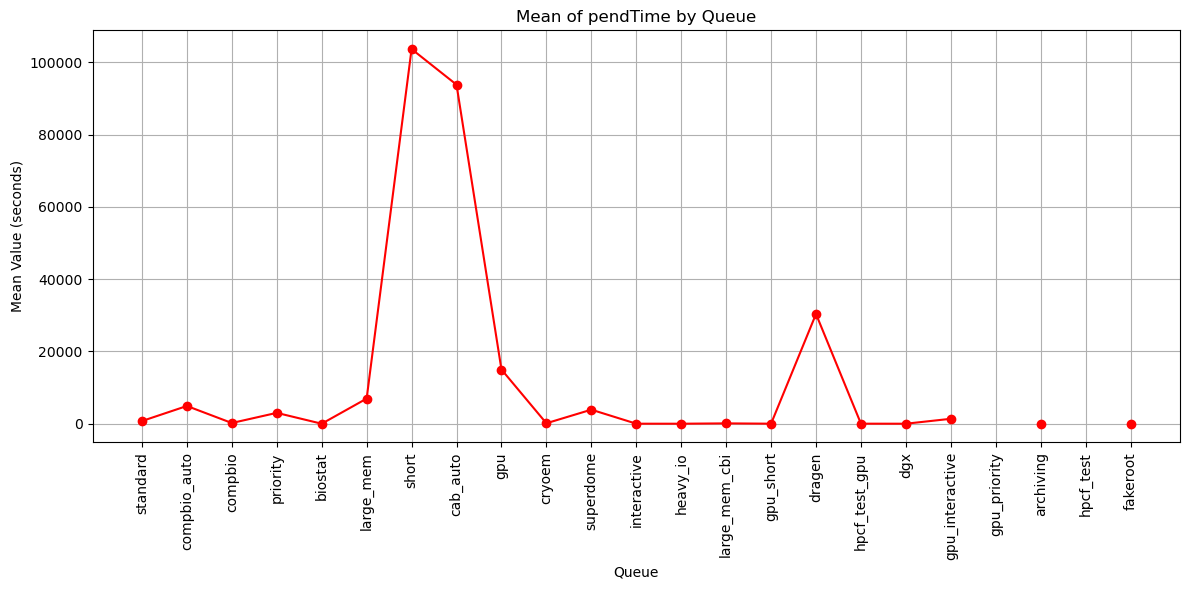

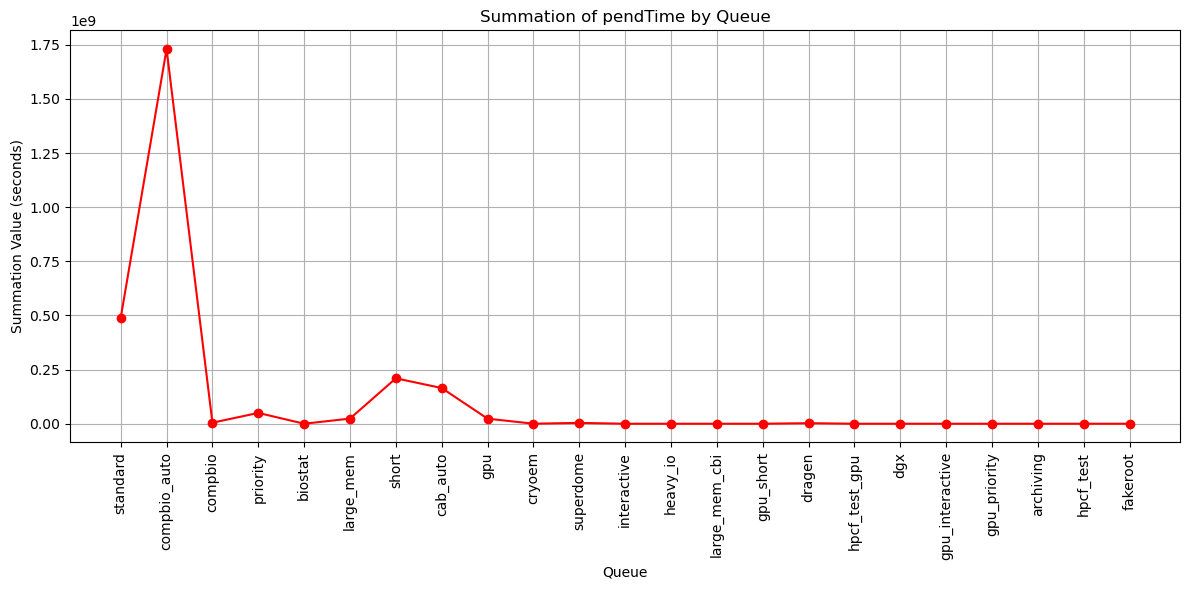

In [75]:
## calculate pending time by queues for userCancelJob=0
### calculate the cpuTime by queues
# Calculate pending time by queues for userCancelJob=0
var_interest = 'pendTime'
df_userNoCancelJob = df_sorted[df_sorted['userCancelJob'] == 0]
summary_stats_by_queue = summary_statistics_by_queue(df_userNoCancelJob, var_interest)
print(summary_stats_by_queue)


# Plotting

plot_summary_statistics(summary_stats_by_queue, var_interest)

In [63]:
# Filter the DataFrame to include only rows where 'queue' == 'gpu_priority'
df_gpu_priority = df_userNoCancelJob[df_userNoCancelJob['queue'] == 'gpu_priority']

# Print the head of the filtered DataFrame
print(df_gpu_priority.head())

# Filter the DataFrame to include only rows where 'queue' == 'gpu_priority'
df_gpu_priority2 = df[df['queue'] == 'gpu_priority']

# Print the head of the filtered DataFrame
print(df_gpu_priority2.head())

### No running job in the gpu_priority and hpcf_test queues from 08/19/2024 to 08/25/2024

Empty DataFrame
Columns: [userId, jobId, jobIdx, numProcessors, jStatus, submitTime, startTime, endTime, queue, resReq, maxRMem, command, cpuTime, runTime, pendTime, submitDay, submitInterval, queue_rename, requested_memory, maxRMem_MB, userCancelJob, runTimetimesProc, runTimetimesNoOfProccessors]
Index: []

[0 rows x 23 columns]
        userId      jobId  jobIdx  numProcessors jStatus  \
55270   106942  233668448       0             10    exit   
55288   106942  233668466       0             10    exit   
56862   106942  233669698       0             10    exit   
56880   106942  233669717       0             10    exit   
164820  106942  233724750       0              1    exit   

                       submitTime                  startTime  \
55270   2024-08-19 15:50:28-05:00  1969-12-31 18:00:00-06:00   
55288   2024-08-19 15:50:30-05:00  1969-12-31 18:00:00-06:00   
56862   2024-08-19 16:57:04-05:00  1969-12-31 18:00:00-06:00   
56880   2024-08-19 16:57:06-05:00  1969-12-31 18:00

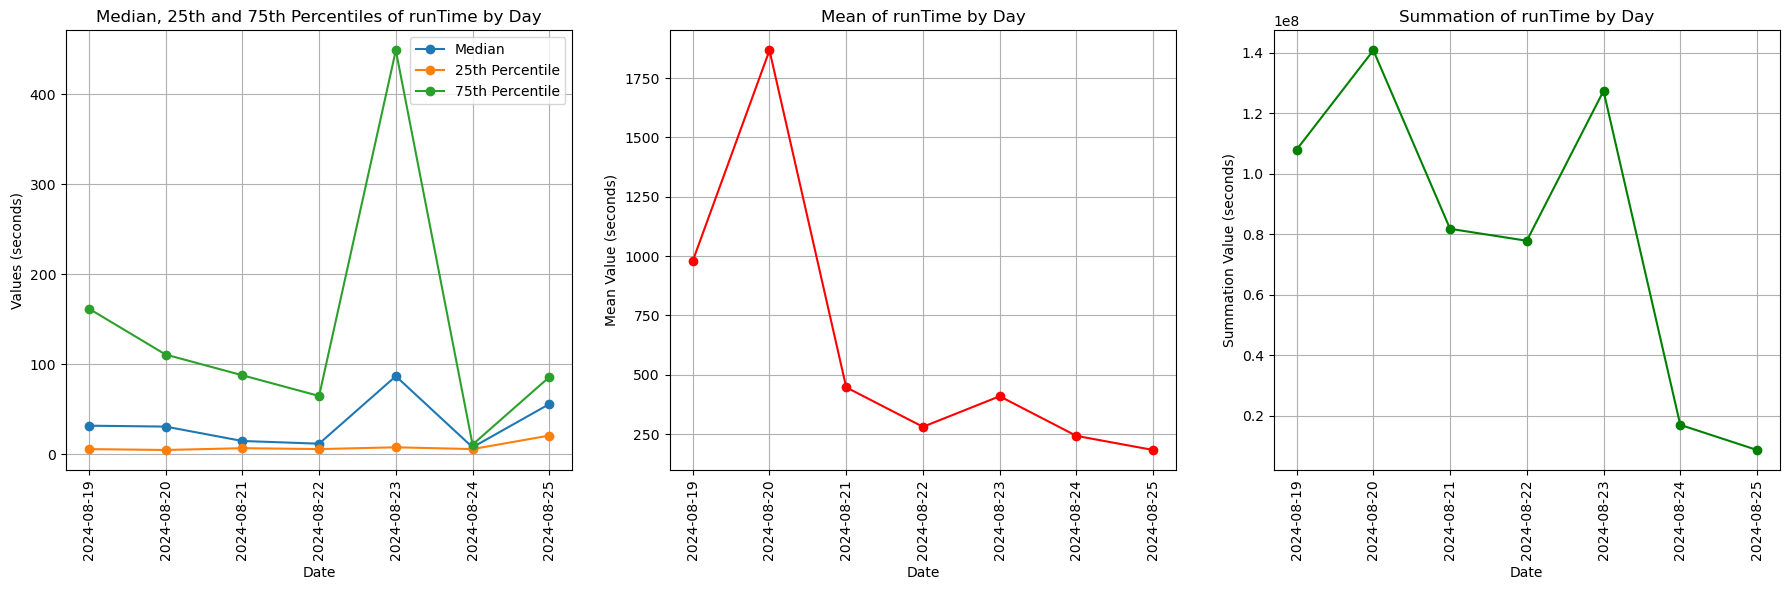

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

def summary_statistics_by_day(df, var_interest):
    # Ensure 'submitTime' is in datetime format
    df = df.copy()  # Create a copy to avoid warnings
    df['submitTime'] = pd.to_datetime(df['submitTime'])
    
    # Extract the date part from 'submitTime' and add it as a new column
    df['submitDate'] = df['submitTime'].dt.date
    
    # Group by the new 'submitDate' column and calculate summary statistics
    summary = df.groupby('submitDate')[var_interest].agg([
        'mean', 
        'median', 
        'min', 
        'max', 
        'std', 
        lambda x: x.quantile(0.25),  # 25th percentile
        lambda x: x.quantile(0.75),   # 75th percentile
        'sum'
    ])
    
    # Rename the quantile columns
    summary.columns = [
        'Mean', 
        'Median', 
        'Min', 
        'Max', 
        'Std Dev', 
        '25th Percentile', 
        '75th Percentile',
        'Summation'
    ]
    
    return summary

def plot_summary_statistics_by_day(df, var_interest):
    # Calculate summary statistics
    stats = summary_statistics_by_day(df, var_interest)
    
    # Plotting
    plt.figure(figsize=(18, 6))

    # Plot for median, 25th percentile, and 75th percentile
    plt.subplot(1, 3, 1)
    plt.plot(stats.index, stats['Median'], label='Median', marker='o')
    plt.plot(stats.index, stats['25th Percentile'], label='25th Percentile', marker='o')
    plt.plot(stats.index, stats['75th Percentile'], label='75th Percentile', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Values (seconds)')
    plt.title(f'Median, 25th and 75th Percentiles of {var_interest} by Day')
    plt.legend()
    plt.xticks(rotation=90)
    plt.grid(True)

    # Plot for mean
    plt.subplot(1, 3, 2)
    plt.plot(stats.index, stats['Mean'], label='Mean', color='red', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Mean Value (seconds)')
    plt.title(f'Mean of {var_interest} by Day')
    plt.xticks(rotation=90)
    plt.grid(True)

    # Plot for summation
    plt.subplot(1, 3, 3)
    plt.plot(stats.index, stats['Summation'], label='Summation', color='green', marker='o')
    plt.xlabel('Date')
    plt.ylabel('Summation Value (seconds)')
    plt.title(f'Summation of {var_interest} by Day')
    plt.xticks(rotation=90)
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'visualization_time/{var_interest}_byday.png')
    plt.show()

# Example usage
if __name__ == "__main__":
    # Load the CSV file into a pandas DataFrame
    file_path = '../common/processed_finished_jobs.csv'
    df = pd.read_csv(file_path)
    
    # Call the plotting function for 'runTime'
    plot_summary_statistics_by_day(df, 'runTime')


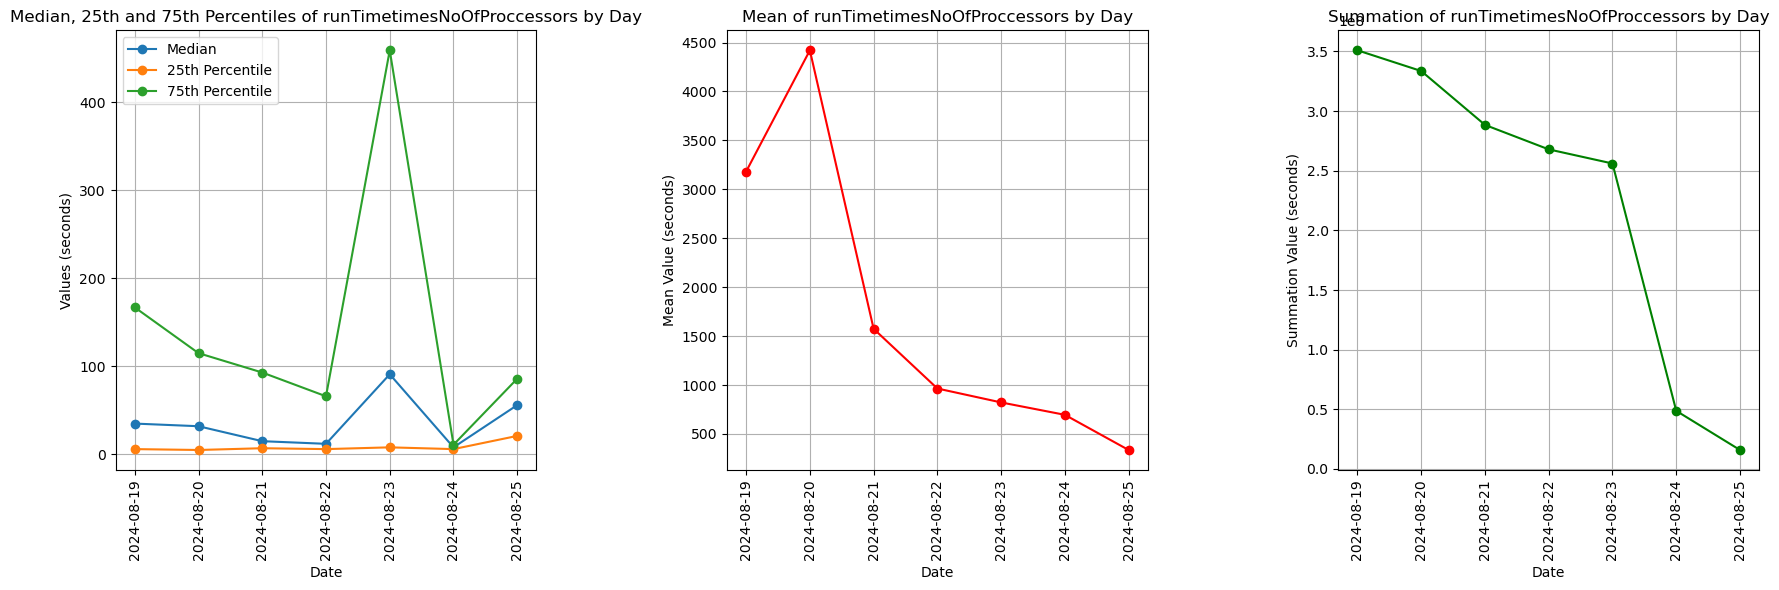

In [86]:
## Calculate summary statistics of runTime times no of processors
df_sorted = df.copy()

df_sorted['runTimetimesNoOfProccessors']=df_sorted['runTime'] * df_sorted['numProcessors']

var_interest = 'runTimetimesNoOfProccessors'

plot_summary_statistics_by_day(df_sorted, var_interest)


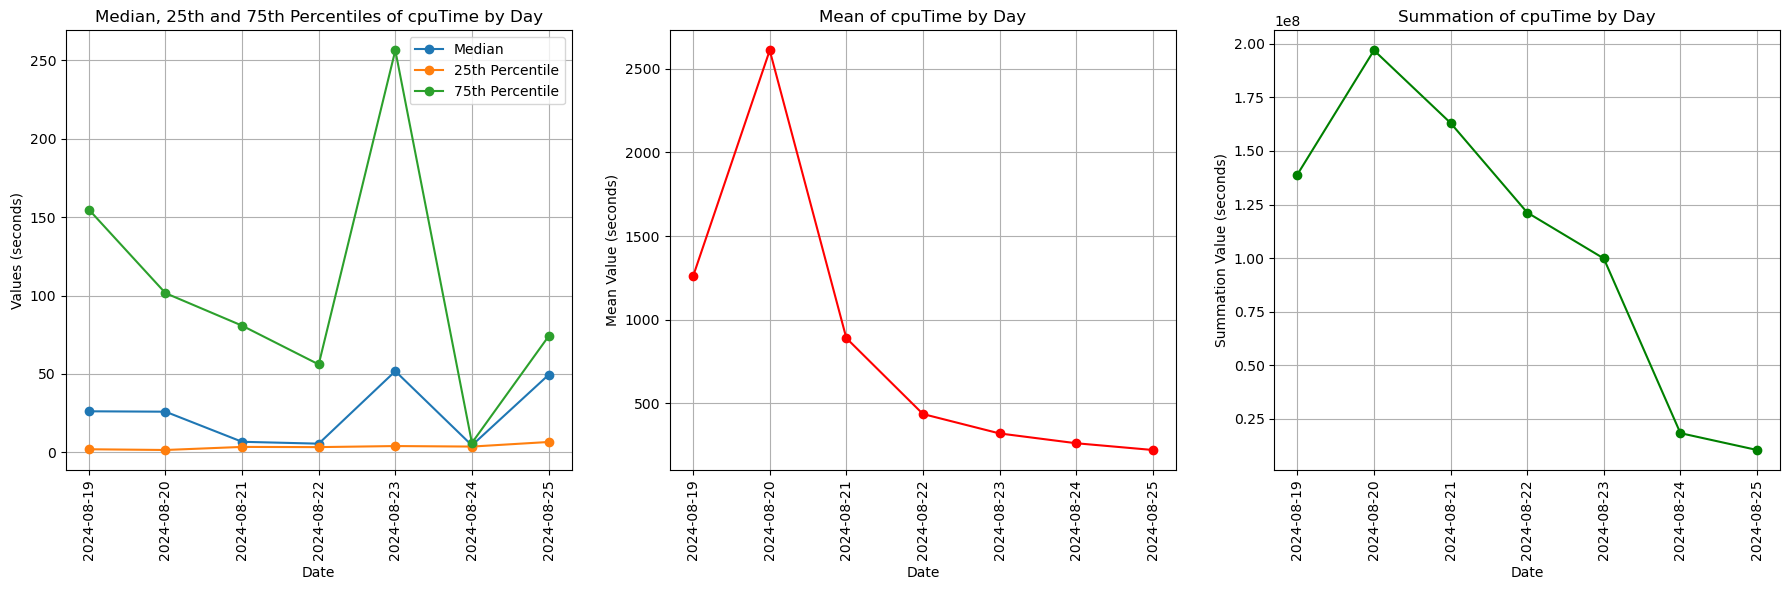

In [88]:
## Calculate summary statistics of cpuTime
var_interest = 'cpuTime'

plot_summary_statistics_by_day(df, var_interest)


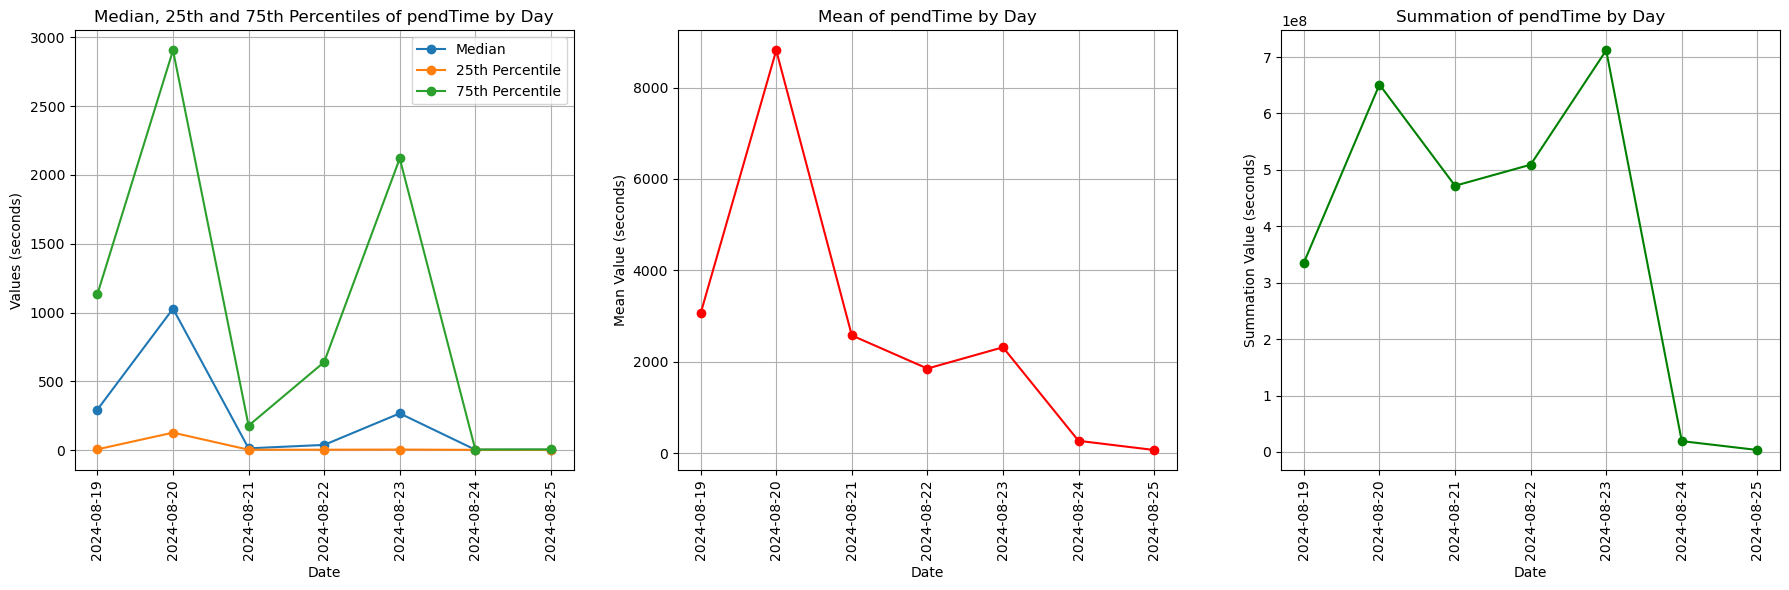

In [87]:
    # Calculate summary statistics of pendTime
    var_interest='pendTime'
# Filter the DataFrame to include only rows where 'userCancelJob' == 0
    filtered_df = df[df['userCancelJob'] == 0]
    
    # Call the plotting function for 'pendTime'
    plot_summary_statistics_by_day(filtered_df, var_interest)
